In [154]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [155]:
mnist = fetch_openml('mnist_784', version=1)

In [156]:
mnist.keys() # skLearn datasets usually have a similar dictionary structure

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [157]:
mnist.DESCR # Get a discription of the dataset

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [158]:
len(mnist.target)

70000

In [159]:
X, y = mnist.data, mnist.target

y = y.astype(int) # The labels are strings but we want them to be integer

Label:  5


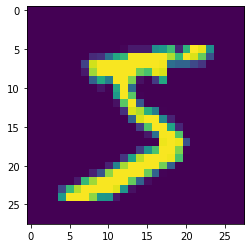

In [160]:
import matplotlib.pyplot as plt

random_digit = X[0]
random_digit_image = random_digit.reshape(28, 28)

print("Label: ", y[0])
plt.imshow(random_digit_image)

## Train-Test Split

In [161]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier

In [162]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

In [163]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [164]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [165]:
sgd_clf.predict([random_digit])

array([ True])

In [166]:
y_train_5_pred = sgd_clf.predict(X_train)

### Binary Classifier Performance Measures

In [167]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Binary Classifier Confusion Matrix

In [168]:
from sklearn.metrics import confusion_matrix

binary_conf_matrix = confusion_matrix(y_train_5, y_train_5_pred)
binary_conf_matrix

array([[52316,  2263],
       [  601,  4820]])

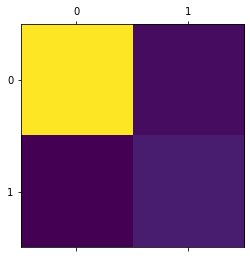

In [169]:
plt.matshow(binary_conf_matrix)

In [170]:
# A perfect result confusion matrix

binary_conf_matrix = confusion_matrix(y_train_5, y_train_5)
binary_conf_matrix

array([[54579,     0],
       [    0,  5421]])

### Binary Classifier Precision and Recall

In [171]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_5_pred)

0.6805026118876183

In [172]:
recall_score(y_train_5, y_train_5_pred)

0.8891348459693783

### Precision and Recall Tradeoff

In [173]:
decision_scores = sgd_clf.decision_function(X_train)
decision_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

In [174]:
# As you can see here the decision score is usually below 0 when the number is not a 5
pd.DataFrame({"Decision Score":decision_scores, "True Value (5)":y_train_5})

,Decision Score,True Value (5)
0,2164.220302,True
1,-5897.373594,False
2,-13489.148058,False
3,-4623.845159,False
4,-6873.052485,False
...,...,...
59995,-5656.947526,False
59996,-3110.180735,False
59997,6007.435130,True
59998,-695.895649,False


### Binary Classifier F1 Harmonic Mean of Precision and Recall

In [175]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_5_pred)

0.7709532949456175

### Binary Classifier Precision Recall Curve

In [176]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [177]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Text(0.5, 0, 'Threshold')

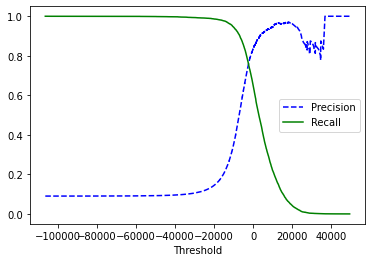

In [178]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel("Threshold")

### Binary Classifier ROC Curve

In [179]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Text(0, 0.5, 'True Positive Rate (Recall)')

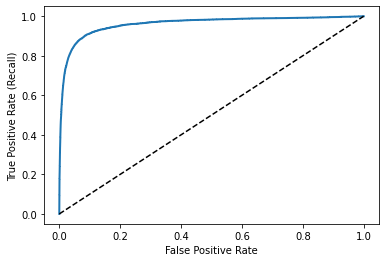

In [180]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")

In [181]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [182]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [183]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC())

In [184]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())

# Our Own Classification Task

We're going to classify a very popular dataset from the University of California at Irvine referenced in this paper:


P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


I obtained the dataset from Kaggle: 

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [185]:
import pandas as pd
import os

In [186]:
pwd = os.getcwd()
wine_filepath = os.path.join("wine.csv")

In [187]:
data_import = pd.read_csv(wine_filepath)
data_import

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Prepare the Data for Classification

You'll notice the last column called "quality" is a numerical column. We'll call any wines with a quality of 3, 4, or 5 "Bad" and any wines with a qualilty of 6, 7, or 8 "Good". If we create a histogram below you'll see why. 

<AxesSubplot:>

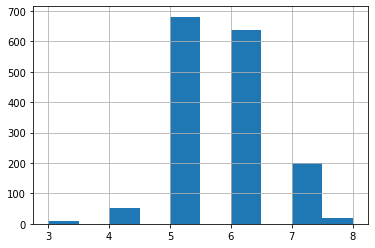

In [188]:
data_import["quality"].hist()

In [189]:
data_import["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [190]:
y = data_import["quality"] > 5
X = data_import.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Train Test Split

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [193]:
scaled_X_test = scaler.transform(X_test)

## Modeling

In [194]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(scaled_X_train, y_train)

SVC()

In [195]:
y_test_predict = svm_clf.p###redict(scaled_X_test)
y_test_predict

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

## Accuracy Metrics

### Confusion Matrix

In [196]:
from sklearn.metrics import confusion_matrix

binary_conf_matrix = confusion_matrix(y_test, y_test_predict)
binary_conf_matrix

array([[109,  32],
       [ 41, 138]])

### Precision and Recall

In [197]:
precision_score(y_test, y_test_predict)

0.8117647058823529

In [198]:
recall_score(y_test, y_test_predict)

0.770949720670391

### ROC Curve

Text(0, 0.5, 'True Positive Rate')

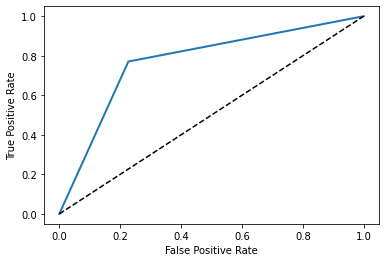

In [199]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [200]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predict)

0.771999683030231

In [201]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [202]:
rfc_predictions = rfc.predict(scaled_X_test,)

In [203]:
from sklearn.metrics import confusion_matrix

rfc_conf_matrix = confusion_matrix(y_test, rfc_predictions)
rfc_conf_matrix

array([[106,  35],
       [ 34, 145]])

Text(0, 0.5, 'True Positive Rate')

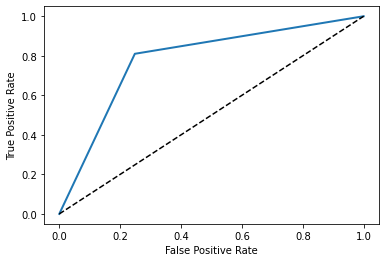

In [204]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [205]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rfc_predictions)

0.7809144577835889

### Hyperparameter Optimization

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(scaled_X_train, y_train, y_train)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=493      True
354      True
342      True
834     False
705     False
        ...  
1130     True
1294     True
860     False
1459     True
1126     True
Name: quality, Length: 1279, dtype: bool as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [208]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [209]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30)

In [214]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestClassifier(max_features=8, n_estimators=30)

In [216]:
best_estimator_predictions = best_estimator.predict(scaled_X_test)

In [217]:
from sklearn.metrics import confusion_matrix

rfc_conf_matrix = confusion_matrix(y_test, best_estimator_predictions)
rfc_conf_matrix

array([[108,  33],
       [ 33, 146]])

Text(0, 0.5, 'True Positive Rate')

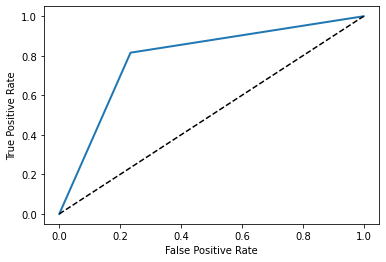

In [218]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, best_estimator_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Multi-Class Classification

Let's try and classify into three different categories: "Bad", "Normal", "Best", and try to create a multi-class classifier.

In [221]:
multi_class = data_import.copy()
multi_class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [252]:
multi_class_mapper = {3:"Bad", 4:"Bad", 5:"Normal", 6:"Normal", 7:"Good", 8:"Good"}
multi_class_mapper

{3: 'Bad', 4: 'Bad', 5: 'Normal', 6: 'Normal', 7: 'Good', 8: 'Good'}

In [253]:
multi_class_y = multi_class["quality"].map(multi_class_mapper)
multi_class_y

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
1594    Normal
1595    Normal
1596    Normal
1597    Normal
1598    Normal
Name: quality, Length: 1599, dtype: object

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, multi_class_y_train, multi_class_y_test = train_test_split(X, multi_class_y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [255]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_X_train, multi_class_y_train)

RandomForestClassifier()

In [256]:
multi_predictions = rfc.predict(scaled_X_test)

In [257]:
multi_matrix = confusion_matrix(multi_class_y_test, multi_predictions)
multi_matrix

array([[  1,   0,  10],
       [  0,  24,  23],
       [  0,  11, 251]])

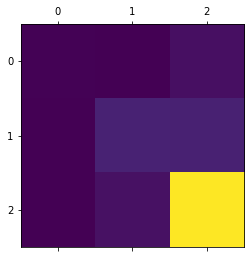

In [258]:
plt.matshow(multi_matrix)

In [259]:
# You can only make the ROC curve for binary classifiers

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(multi_class_y_test, multi_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

ValueError: multiclass format is not supported

In [260]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, multi_class_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [261]:
multi_best = grid_search.best_estimator_
multi_best

RandomForestClassifier(max_features=4, n_estimators=30)

In [263]:
multi_predictions = multi_best.predict(scaled_X_test)

In [264]:
confusion_matrix(multi_class_y_test, multi_predictions)

array([[ 11,   0,   0],
       [  3,  17,  27],
       [ 86,  26, 150]])

In [266]:
precision_score(multi_class_y_test, multi_predictions, average="weighted")

0.755704042668506

### Multi-Label Classifier

In [297]:
quality = data_import["quality"] > 5
alcohol = data_import["alcohol"] > 10
y_multi_label = np.c_[alcohol, quality]
y_multi_label

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [ True,  True],
       [ True, False],
       [ True,  True]])

In [298]:
x_multi_label = data_import.iloc[:, :-2]
x_multi_label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [299]:
from sklearn.model_selection import train_test_split

multi_label_X_train, multi_label_X_test, multi_label_y_train, multi_label_y_test = train_test_split(x_multi_label, y_multi_label, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

multi_label_scaled_X_train = scaler.fit_transform(X_train)
multi_label_scaled_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [300]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(multi_label_X_train, multi_label_y_train)

KNeighborsClassifier()

In [315]:
multi_label_predictions = knn_clf.predict(multi_label_X_test)
multi_label_predictions[:5]

array([[False,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [316]:
# You can't use confusion matrices on both predictions simultaneously

confusion_matrix(multi_label_y_test, multi_class_predictions)

ValueError: multilabel-indicator is not supported

In [317]:
alc_predictions = [i[0] for i in multi_label_predictions]
qual_predictions = [i[1] for i in multi_label_predictions]

In [319]:
alc_test = [i[0] for i in multi_label_y_test]
qual_test = [i[1] for i in multi_label_y_test]

In [320]:
alc_confusion_matrix = confusion_matrix(alc_test, alc_predictions)
qual_confusion_matrix = confusion_matrix(qual_test, qual_predictions)

array([[ 92,  59],
       [ 59, 110]])

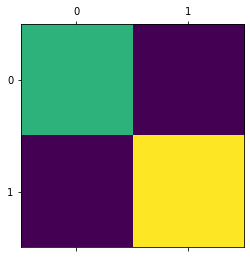

In [325]:
plt.matshow(alc_confusion_matrix)
alc_confusion_matrix

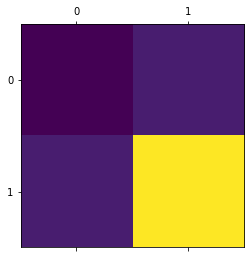

In [324]:
plt.matshow(qual_confusion_matrix)
qual_confusion_matrix